# Custom indicator example

In [6]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass


In [8]:
ticker = 'AAPL'
prices = yf.Ticker(ticker).history('5y')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-04 00:00:00-04:00,54.688986,54.873347,54.262795,54.677013,109560400,0.0,0.0
2018-09-05 00:00:00-04:00,54.827860,54.990673,53.896465,54.320259,133332000,0.0,0.0
2018-09-06 00:00:00-04:00,54.167019,54.435187,52.986614,53.417595,137160000,0.0,0.0
2018-09-07 00:00:00-04:00,53.118307,53.961110,52.845353,52.986618,150479200,0.0,0.0
2018-09-10 00:00:00-04:00,52.902812,53.118304,51.830151,52.275497,158066000,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,0.0,0.0
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,0.0,0.0
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,0.0,0.0


In [3]:

@dataclass
class DEMA:
    """ Double Exponential Moving Average """
    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [4]:
res = DEMA(20)(prices)
res.tail()


date
2023-08-28 00:00:00-04:00    176.822910
2023-08-29 00:00:00-04:00    177.833320
2023-08-30 00:00:00-04:00    179.357821
2023-08-31 00:00:00-04:00    180.720890
2023-09-01 00:00:00-04:00    182.189972
Name: close, dtype: float64

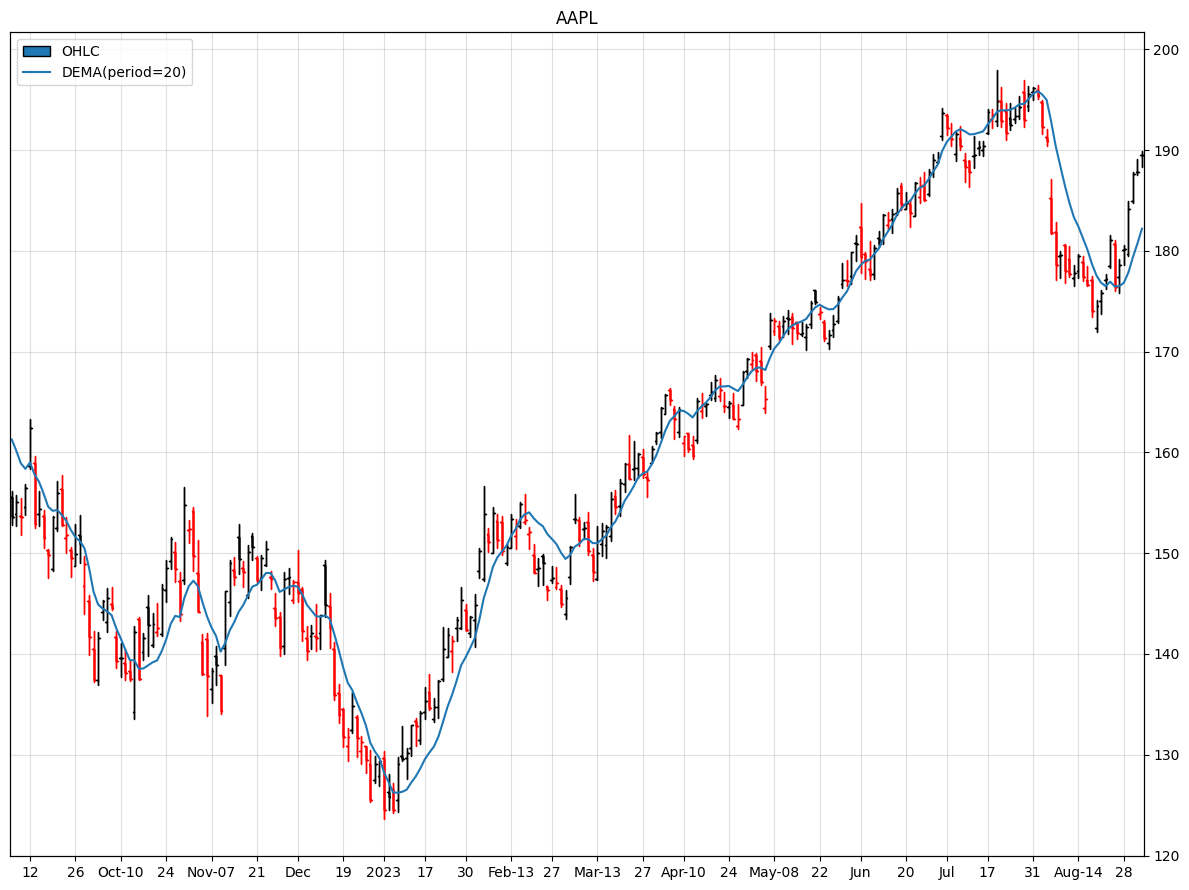

In [5]:
max_bars = 250

indicators = [
    OHLC(), DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
